In [38]:
%matplotlib inline
from datascience import *
import numpy as np
from sql import *
from matplotlib import pyplot as plt
import pandas as pd


# The Burrito Food Cart

In 1990, Mr. A decided to invest in a Mexican food cart in Manhattan. He would work 5 days a week from 11:30 AM to 1:30 PM. His focus was to sell the best burritos in town. In the neighborhood, he remained the only burrito cart owner for 4 years, until 1995, when a competitor, Mr. B, decided to open up another burrito cart in the neighborhood. Mr. B was able to build a name very fast. People liked his burritos much more and with time, he became people's #1 choice. In 2000, two new burrito carts opened and 5 years later the fifth one opened. These last carts used to sell their burritos for much less but were never able to offer burritos that were as tasty as those offered by Mr. B. By then, Mr. A was unable to compete anymore; he neither had a price nor quality advantage and decided to shut down his business in 2008. To see each cart's market share from 1990 - 2010, load the following file into a table: `marketshare.csv`

Q1. For simplicity, relabel the "Market Share" column to MS.

Q2. Verify that every year, the total market share of all opened carts for that year adds up to 1.

Q3. The table below shows daily demand:

| Year | Daily Demand | 
|------|--------------|
| 1990 |      100     | 
| 1991 |      110     | 
| 1992 |      120     | 
| 1993 |      130     | 
| 1994 |      140     |

and would increase by 10 customers every year. Create a new table which gives the annual customer demand for burritos in the neighborhood where the carts stand. You can assume 5 days/week and 50 weeks/year.


Q4. Assume that Mr. A and Mr. B sell their burritos for \$4, while the other carts offer their burritos for only \$3. Using the market share and demand data, calculate the annual profit for each cart, where profit is (revenue - cost) and the table below shows how much it costs each of the cart owners to make a burrito. Do all necessary calculations, but your final table should have 3 columns with the following labels: Year, Cart and Annual Profit

| Cart | Cost | 
|------|------|
|  A   |  2   | 
|  B   | 2.5  | 
|  C   | 1.5  | 
|  D   | 1.8  | 
|  E   | 1.3  |

Q5. Which cart was able to generate the highest annual profit?

Q6. Which cart was able to generate the highest average annual revenue?

Q7. If you were the owner of cart A, would you have shut down the business? Explain your answer using the data.

Q8. In which year did Cart E make the most profit?

Q9. Create a matrix that shows the annual profits of each cart. Each row is a year, while each column represents a cart and the cell entry holds the annual profit. 

In [2]:
market=Table()

In [3]:
market=Table.read_table('marketshare.csv')
market

/Users/apple/anaconda3/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Year,Cart,Market Share
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8
1994,B,0.2
1995,A,0.5
1995,B,0.5
1996,A,0.4
1996,B,0.6


In [4]:
#Q1: rename Market Share to MS
market=market.relabeled(2,"MS")
market

Year,Cart,MS
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8
1994,B,0.2
1995,A,0.5
1995,B,0.5
1996,A,0.4
1996,B,0.6


In [65]:
#Q2:Verify that every year, the total market share of all opened carts for that year adds up to 1.
verified=market.group('Year',sum)
#verified.row(-6)
verified.select('Year','MS sum').where('MS sum',are.not_equal_to(1))

Year,MS sum


By selecting grouped rows w.r.t 'Year' whose market share sum is not 1, none is selected, 
thus it's verified that every year, the total market share of all opened carts for that year adds up to 1.

In [6]:
#Q3: Create a new table which gives the annual customer demand for burritos in the neighborhood where the carts stand.

#get year
demand=verified.select('Year')
year=list(demand.column(0))
#compute daily demand
daily_demand=np.array([100+10*i for i in range(len(year))])
demand=demand.with_column('Daily Demand',daily_demand)
demand

Year,Daily Demand
1990,100
1991,110
1992,120
1993,130
1994,140
1995,150
1996,160
1997,170
1998,180
1999,190


Q4. Assume that Mr. A and Mr. B sell their burritos for  4,𝑤ℎ𝑖𝑙𝑒𝑡ℎ𝑒𝑜𝑡ℎ𝑒𝑟𝑐𝑎𝑟𝑡𝑠𝑜𝑓𝑓𝑒𝑟𝑡ℎ𝑒𝑖𝑟𝑏𝑢𝑟𝑟𝑖𝑡𝑜𝑠𝑓𝑜𝑟𝑜𝑛𝑙𝑦 3. Using the market share and demand data, calculate the annual profit for each cart, where profit is (revenue - cost) and the table below shows how much it costs each of the cart owners to make a burrito. Do all necessary calculations, but your final table should have 3 columns with the following labels: Year, Cart and Annual Profit

Cart	Cost
A	2
B	2.5
C	1.5
D	1.8
E	1.3


In [7]:
#calculate profit per burrito
cost=Table().with_column('Cart',make_array('A','B','C','D','E'),'Cost',make_array(2,2.5,1.5,1.8,1.3),'Price',make_array(4,4,3,3,3))
cost=cost.with_column('per profit',cost.column('Price')-cost.column('Cost'))
cost

Cart,Cost,Price,per profit
A,2,4,2
B,2.5,4,1.5
C,1.5,3,1.5
D,1.8,3,1.2
E,1.3,3,1.7


In [8]:
#profit=demand*marketshare*per_profit
combined=market.join('Year',demand).join('Cart',cost)
combined=combined.with_column('Annual Profit',combined.column('Daily Demand')*combined.column('MS')*combined.column('per profit'))
combined

Cart,Year,MS,Daily Demand,Cost,Price,per profit,Annual Profit
A,1990,1,100,2,4,2,200
A,1991,1,110,2,4,2,220
A,1992,1,120,2,4,2,240
A,1993,1,130,2,4,2,260
A,1994,0.8,140,2,4,2,224
A,1995,0.5,150,2,4,2,150
A,1996,0.4,160,2,4,2,128
A,1997,0.4,170,2,4,2,136
A,1998,0.4,180,2,4,2,144
A,1999,0.4,190,2,4,2,152


In [9]:
annual_profit=combined.select('Year','Cart','Annual Profit')
annual_profit

Year,Cart,Annual Profit
1990,A,200
1991,A,220
1992,A,240
1993,A,260
1994,A,224
1995,A,150
1996,A,128
1997,A,136
1998,A,144
1999,A,152


In [10]:
#Q5. Which cart was able to generate the highest annual profit?
annual_profit.select('Cart','Annual Profit').sort('Annual Profit',descending=True).take(0)

Cart,Annual Profit
A,260


In [11]:
#Q6. Which cart was able to generate the highest average annual revenue?
#compute annual revenue
combined=combined.with_column('Annual Revenue',combined.column('Price')*combined.column('Daily Demand')*combined.column('MS'))
combined

Cart,Year,MS,Daily Demand,Cost,Price,per profit,Annual Profit,Annual Revenue
A,1990,1,100,2,4,2,200,400
A,1991,1,110,2,4,2,220,440
A,1992,1,120,2,4,2,240,480
A,1993,1,130,2,4,2,260,520
A,1994,0.8,140,2,4,2,224,448
A,1995,0.5,150,2,4,2,150,300
A,1996,0.4,160,2,4,2,128,256
A,1997,0.4,170,2,4,2,136,272
A,1998,0.4,180,2,4,2,144,288
A,1999,0.4,190,2,4,2,152,304


In [21]:
#Count num of year of each cart and total profit using group
annual_profit_sum=combined.group('Cart',sum)
year_count=combined.group('Cart')
#join everything
avg_annual=year_count.join('Cart',annual_profit_sum)
avg_annual=avg_annual.with_column('Avg Revenue',avg_annual.column('Annual Revenue sum')/avg_annual.column('count'))
avg_annual


Cart,count,Year sum,MS sum,Daily Demand sum,Cost sum,Price sum,per profit sum,Annual Profit sum,Annual Revenue sum,Avg Revenue
A,18,35973,8.1,3330,36,72,36,2391,4782,265.667
B,17,34034,7.1,3740,42.5,68,25.5,2268.75,6050,355.882
C,11,22055,2.37,2750,16.5,33,16.5,891.75,1783.5,162.136
D,11,22055,2.23,2750,19.8,33,13.2,676.8,1692,153.818
E,6,12045,1.2,1650,7.8,18,10.2,566.95,1000.5,166.75


In [22]:
avg_annual=avg_annual.drop(np.arange(1,10))
hi_avg_annual=avg_annual.sort('Avg Revenue', descending=True).take(0)
hi_avg_annual

Cart,Avg Revenue
B,355.882


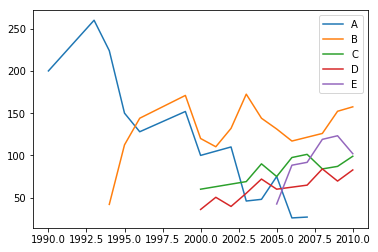

In [30]:
#Q7. If you were the owner of cart A, would you have shut down the business? Explain your answer using the data.

#Draw annual profit plot
a_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('A'))
b_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('B'))
c_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('C'))
d_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('D'))
e_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('E'))
plt.plot(a_profit.column('Year'),a_profit.column('Annual Profit'), label='A')
plt.plot(b_profit.column('Year'),b_profit.column('Annual Profit'), label='B')
plt.plot(c_profit.column('Year'),c_profit.column('Annual Profit'), label='C')
plt.plot(d_profit.column('Year'),d_profit.column('Annual Profit'), label='D')
plt.plot(e_profit.column('Year'),e_profit.column('Annual Profit'), label='E')
plt.legend()
plt.show()

Based on the annual profit plot above, we can tell that A's annual profit is dropping significantly, 
and has been so low that I think I would shut down the business if I were him.

In [33]:
#Q8. In which year did Cart E make the most profit?
#e_profit=combined.select('Cart','Year','Annual Profit').where('Cart',are.equal_to('E')).sort('Annual Profit',descending=True).take(0)
e_profit.sort('Annual Profit',descending=True).take(0)

Cart,Year,Annual Profit
E,2009,123.25


In [50]:
#Q9. Create a matrix that shows the annual profits of each cart. Each row is a year,
#while each column represents a cart and the cell entry holds the annual profit.

#use pandas for left outer join
demand_df=demand.to_df()
a_profit_df=a_profit.relabeled('Annual Profit','A').to_df()
b_profit_df=b_profit.relabeled('Annual Profit','B').to_df()
c_profit_df=c_profit.relabeled('Annual Profit','C').to_df()
d_profit_df=d_profit.relabeled('Annual Profit','D').to_df()
e_profit_df=e_profit.relabeled('Annual Profit','E').to_df()
result = pd.merge(demand_df['Year'],a_profit_df[['Year', 'A']],on='Year', how='left')
result = pd.merge(result[['Year','A']],b_profit_df[['Year', 'B']],on='Year', how='left')
result = pd.merge(result[['Year','A','B']],c_profit_df[['Year', 'C']],on='Year', how='left')
result = pd.merge(result[['Year','A','B','C']],d_profit_df[['Year', 'D']],on='Year', how='left')
result = pd.merge(result[['Year','A','B','C','D']],e_profit_df[['Year', 'E']],on='Year', how='left')
result

,Year,A,B,C,D,E
0,1990,200.0,NaN,NaN,NaN,NaN
1,1991,220.0,NaN,NaN,NaN,NaN
2,1992,240.0,NaN,NaN,NaN,NaN
3,1993,260.0,NaN,NaN,NaN,NaN
4,1994,224.0,42.00,NaN,NaN,NaN
5,1995,150.0,112.50,NaN,NaN,NaN
6,1996,128.0,144.00,NaN,NaN,NaN
7,1997,136.0,153.00,NaN,NaN,NaN
8,1998,144.0,162.00,NaN,NaN,NaN
9,1999,152.0,171.00,NaN,NaN,NaN


# Unemployment 

The Federal Reserve Bank of St. Louis publishes data about jobs in the US. Load the file `unemployment.csv` for data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate. Among people who are able to work and are looking for a full-time job:

1. NEI is the percentage who can't find a job (Non-Employment Index).
2. PTER is the percentage of those are only working at a part-time job ( Part-Time for Economic Reasons). 

Our data has a column for NEI and a columnd for NEI-PTER, which is the combined percentage of both groups. 

Q1. Create a table which containts data for the top 10 quarters, where the Non-Employment Index was highest.

Q2. Create a table which only contains information for Years 2000-2005.

Q3. It is believed that many people became PTER in the "Great Recession" of 2008-2009 and so the PTER became very high during those quarters. Does the data show reasonable evidence for such assumption? Explain your answer.

In [53]:
unemploy=Table()
unemploy=unemploy.read_table('unemployment.csv')
unemploy

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [60]:
#Q1. Create a table which containts data for the top 10 quarters, where the Non-Employment Index was highest.
nei_10=unemploy.sort(unemploy.column('NEI'),descending=True).take(np.arange(10))
nei_10

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [75]:
#Q2. Create a table which only contains information for Years 2000-2005.
#year_5=unemploy.where('Date',are.containing('2000') or are.containing('2001') 
#                      or are.containing('2002') or are.containing('2003')
#                     or are.containing('2004') or are.contaning('2005'))

#get year from date
year=list(unemploy.column('Date'))
year=np.array([int(item[:4]) for item in year])

#select using where(year) then drop year
year_5=unemploy.with_column('year',year)
year_5_display=year_5.where('year',are.between(2000,2006)).drop('year')
year_5_display

Date,NEI,NEI-PTER
2000-01-01,7.6128,8.3379
2000-04-01,7.6754,8.4199
2000-07-01,7.6915,8.4458
2000-10-01,7.6769,8.4192
2001-01-01,7.757,8.4969
2001-04-01,8.0353,8.804
2001-07-01,8.1444,8.9862
2001-10-01,8.6782,9.6705
2002-01-01,9.0119,9.93
2002-04-01,8.9295,9.8924


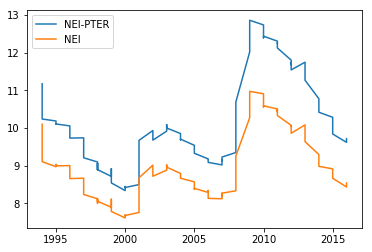

In [77]:
#Q3. It is believed that many people became PTER in the "Great Recession" of 2008-2009 
#and so the PTER became very high during those quarters. 
#Does the data show reasonable evidence for such assumption? Explain your answer.
nei_pter=unemploy.column('NEI-PTER')
nei=unemploy.column('NEI')
plt.plot(year,nei_pter,label='NEI-PTER')
plt.plot(year,nei,label='NEI')
plt.legend()
plt.show()

From the plot above, we can see that NEI-PTER increased significantly in 2008-2009, thus the data shows reasonable evidence for such assumption.